C = 0.010 nF
R = 100.000 M ohms
tau = 1.000 ms
(Theoretical)
tau = 1.000 ms
(Experimental)


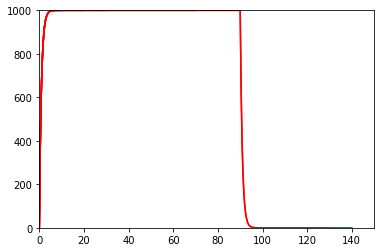

In [13]:
from __future__ import print_function
"""
Created on Wed Apr 22 15:53:00 2015

Charging and discharging curves for passive membrane patch
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt

# input current
I = 10 # nA

# capacitance and leak resistance

C = 0.1/10 # nF
R = 100 # M ohms
tau = R*C # = 0.1*100 nF-Mohms = 100*100 pF Mohms = 10 ms
print('C = %.3f nF' % C)
print('R = %.3f M ohms' % R)
print('tau = %.3f ms' % tau)
print('(Theoretical)')

# membrane potential equation dV/dt = - V/RC + I/C

tstop = 150 # ms

V_inf = I*R # peak V (in mV)
tau = 0 # experimental (ms)

h = 0.2 # ms (step size)

V = 0 # mV
V_trace = [V] # mV

for t in np.arange(h, tstop, h):

   # Euler method: V(t+h) = V(t) + h*dV/dt
   V = V +h*(- (V/(R*C)) + (I/C))

   # Verify membrane time constant
   if (not tau and (V > 0.6321*V_inf)):
     tau = t
     print('tau = %.3f ms' % tau)
     print('(Experimental)')

   
   # Stop current injection 
   if t >= 0.6*tstop:
     I = 0

   V_trace += [V]
   if t % 10 == 0:
       plt.plot(np.arange(0,t+h, h), V_trace, color='r')
       plt.xlim(0, tstop)
       plt.ylim(0, V_inf)
       plt.draw()
       
plt.show()